# Lab 4 - part2

### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html


In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from skimage import feature
from scipy import ndimage, misc
from skimage import filters
from scipy.signal import convolve2d

import cv2


In [2]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''


'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

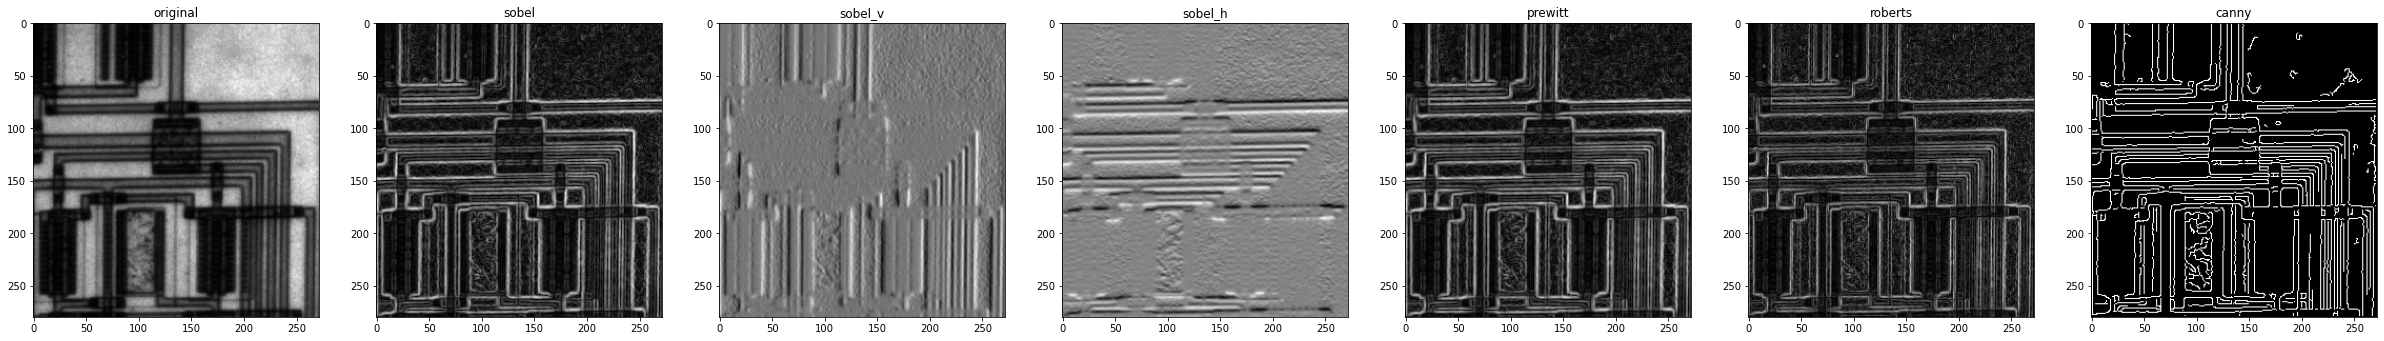

In [3]:
# 1. Built-in Sobel, Prewill, Roberts, Canny

# img = rgb2gray(io.imread('circuit.tif'))
img = io.imread('circuit.tif')
sobel_img = sobel(img)
sobel_img_v = sobel_v(img)
sobel_img_h = sobel_h(img)
prewitt_img = prewitt(img)
roberts_img = roberts(img)
canny_img = canny(img)

show_images([img, sobel_img, sobel_img_v, sobel_img_h, prewitt_img, roberts_img,  canny_img], [
            'original', 'sobel', 'sobel_v', 'sobel_h', 'prewitt', 'roberts', 'canny'])


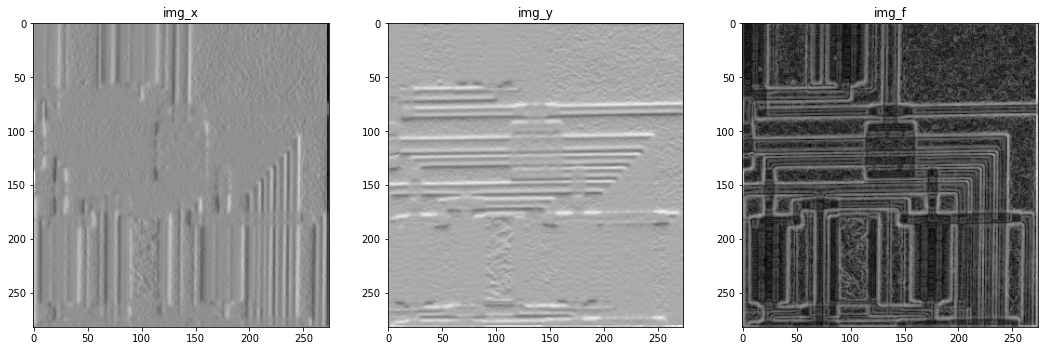

In [4]:
# 2. Custom Sobel (V-H-Both)
hx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
hy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
imgx= convolve2d(img , hx)
imgy= convolve2d(img , hy)
imgf = np.sqrt(np.abs(imgx*2) + np.abs(imgy*2))
show_images([imgx,imgy,imgf] , ['img_x' , 'img_y','img_f'])

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
[[ 15  15  15 ... 148 144 142]
 [ 16  14  14 ... 135 144 151]
 [ 16  16  14 ... 134 141 152]
 ...
 [ 36  59  78 ...  87  76  61]
 [ 31  45  53 ...  88  76  63]
 [ 27  39  47 ...  87  74  62]]
0.7019824937942791
0.049834094668643386


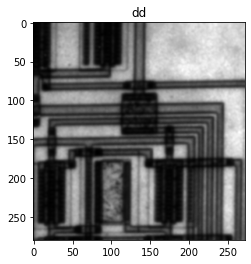

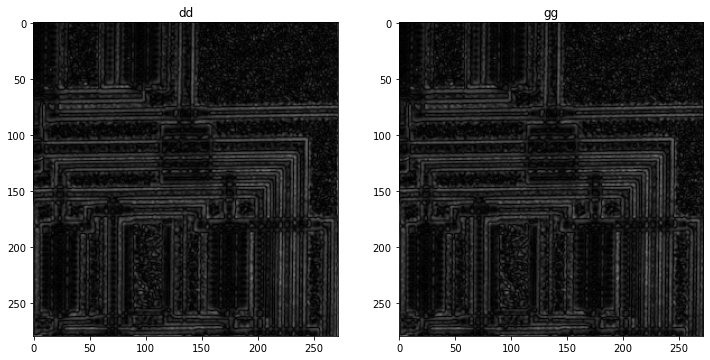

0.5026081630816006
9.007330682708758e-07
0.17003112800256204
2.2934099894178495e-07
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 1.]]


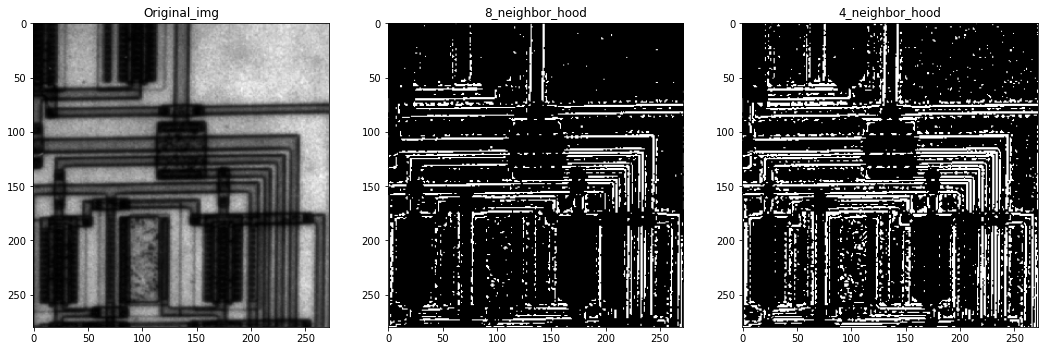

In [5]:
# 3. Custom LoG
thres = 20
log1 = f4 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
log2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
print(log1)
# custom_log_img = np.copy(img)
custom_log_img = io.imread('circuit.tif')
print(custom_log_img)
g1 = gaussian(custom_log_img, sigma=1)
print(np.max(g1))
print(np.min(g1))
# print(np.min(try1))
show_images([g1], ['dd'])
# imgx = convolve2d(g1, log1)
imgx = cv2.filter2D(g1, -1, log1)
imgx = np.abs(imgx)
# imgy = convolve2d(g1, log2)
imgy = cv2.filter2D(g1, -1, log2)
imgy = np.abs(imgy)
# imgx=np.abs(imgx)
# print(imgx*255)
show_images([imgx, imgy], ['dd', 'gg'])
print(np.max(imgx))
print(np.min(imgx))
print(np.max(imgy))
print(np.min(imgy))

imgx[(imgx > 0.1)] = 1
imgx[(imgx < 0.1)] = 0
print(imgx)
imgy[(imgy > 0.027)] = 1
imgy[(imgy < 0.027)] = 0
print(imgy)


# print(imgx)
# ret, bw_img = cv2.threshold(imgy,0.7, 1, cv2.THRESH_BINARY)


show_images([img, imgx, imgy], ['Original_img',
            '8_neighbor_hood', '4_neighbor_hood'])


In [6]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''


'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'